In [37]:
pip install opencv-python opencv-python-headless numpy matplotlib



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def display_image(image, title='Image'):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

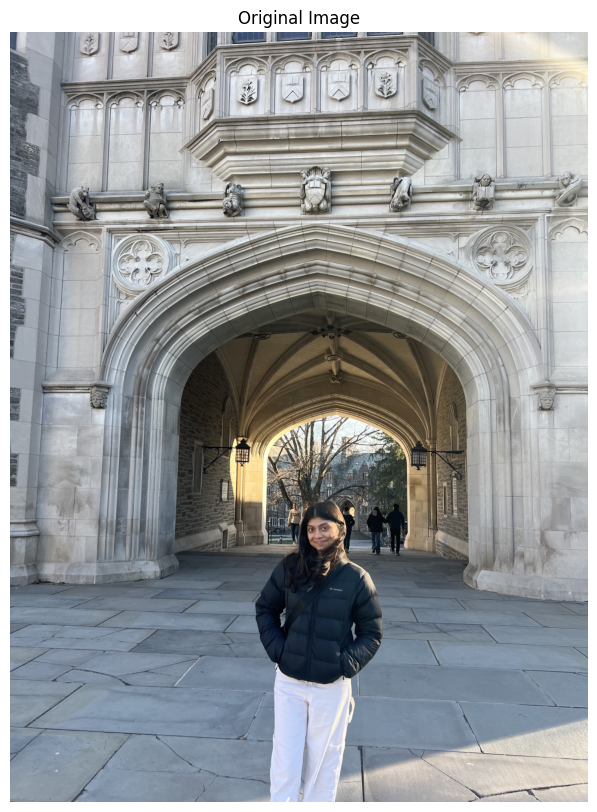

In [40]:
image_path= 'kavya.jpeg'
image = cv2.imread(image_path)
if image is None:
    print("Could not open or find the image")
    
display_image(image, title='Original Image')

In [41]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [42]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [48]:
gray = cv2.equalizeHist(gray)

In [49]:
gray = cv2.GaussianBlur(gray, (5, 5), 0)

In [43]:
scale_factor = 1.3
min_neighbors = 8
min_size = (30, 30)


In [44]:
faces = face_cascade.detectMultiScale(gray, scaleFactor=scale_factor, minNeighbors=min_neighbors, minSize=min_size)

In [50]:
for (x, y, w, h) in faces:
    face_region = image[y:y+h, x:x+w]
    
  
    blurred_face = cv2.GaussianBlur(face_region, (99, 99), 30)
    
    
    image[y:y+h, x:x+w] = blurred_face


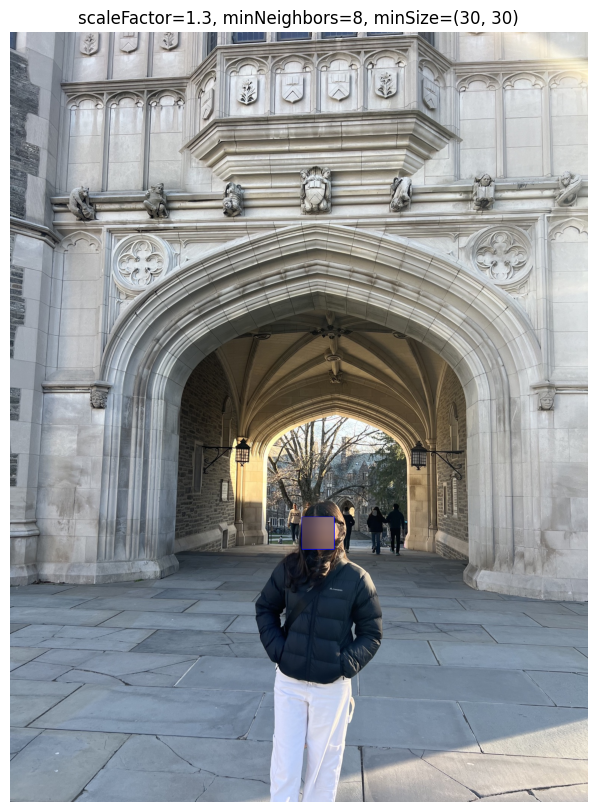

In [51]:
display_image(image, title=f'scaleFactor={scale_factor}, minNeighbors={min_neighbors}, minSize={min_size}')


In [52]:
print(f'Number of faces detected: {len(faces)}')
for i, (x, y, w, h) in enumerate(faces):
    print(f'Face {i + 1}: x={x}, y={y}, w={w}, h={h}')

Number of faces detected: 1
Face 1: x=776, y=1290, w=85, h=85
